# SPRINT 14 PRONOSTICOS Y PREDICCIONES 

# ESTRATEGIA MODEL FITNESS

## ¿Como descubrir cuando un cliente ya no esta con nosotros?

## LIBRERIAS

In [5]:
pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score


## CANCELACION POR MES DF

In [8]:
DATA_PATH = '../data/raw/gym_churn_us.csv'
churn = pd.read_csv(DATA_PATH)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [9]:
churn.sample(20)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
316,1,1,1,1,1,1,0,23,191.818063,1.0,1,1.553378,1.120285,1
1577,1,1,0,0,1,1,1,30,76.138930,1.0,3,0.967083,0.946514,0
3935,0,1,1,1,1,6,0,33,287.464651,6.0,16,2.274630,2.242193,0
1783,1,1,0,0,1,1,0,33,206.835268,1.0,7,2.225282,2.210900,0
2168,0,1,1,1,1,1,0,24,92.961490,1.0,0,1.723731,0.514610,1
2388,1,1,0,1,1,12,1,31,208.846277,12.0,10,2.276956,2.127821,0
1254,1,1,0,0,0,1,0,28,138.608221,1.0,0,0.000000,0.000000,1
75,1,0,0,0,1,1,0,30,8.398417,1.0,2,1.851313,1.363330,1
1148,0,1,1,0,1,12,1,28,288.949445,11.0,3,2.848071,2.806416,0
2054,0,0,0,0,1,1,0,29,11.573675,1.0,1,1.552555,0.831657,1


In [10]:
churn.columns=('gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period' ,'group_visits', 'age', 'avg_additional_charges_ttl' , 'month_to_end_contract', 'lifetime', 'avg_class_freq_ttl', 'avg_class_freq_month', 'churn')

In [11]:
print('Unicos de genero:', churn['gender'].unique())
print()
print('Unicos de periodo de contrato:', churn['contract_period'].unique())
print()
print('Unicos de edad:' ,churn['age'].unique())
print()
print('Unicos de mes para fin de contrato:', churn['month_to_end_contract'].unique())
print()
print('Unicos de lifetime:',churn['lifetime'].unique())



Unicos de genero: [1 0]

Unicos de periodo de contrato: [ 6 12  1]

Unicos de edad: [29 31 28 33 26 34 32 30 23 27 35 25 36 24 21 37 22 19 20 38 39 18 41]

Unicos de mes para fin de contrato: [ 5. 12.  1.  6.  3. 10. 11.  9.  4.  7.  8.  2.]

Unicos de lifetime: [ 3  7  2  0  1 11  4  8 14  6  5 15 12 21 10 20  9 13 17 16 24 22 31 26
 23 18 19 27 29]


In [12]:
churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_ttl,month_to_end_contract,lifetime,avg_class_freq_ttl,avg_class_freq_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [13]:
churn.groupby("churn").mean(numeric_only=True)


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_ttl,month_to_end_contract,lifetime,avg_class_freq_ttl,avg_class_freq_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [ ]:
churn_distribution = (churn['churn'].value_counts(normalize=True).rename({0: 'No Churn', 1: 'Churn'})* 100)
churn_table = churn_distribution.reset_index()
churn_table.columns = ['Estado', 'Porcentaje']

churn
No Churn    73.475
Churn       26.525
Name: proportion, dtype: float64


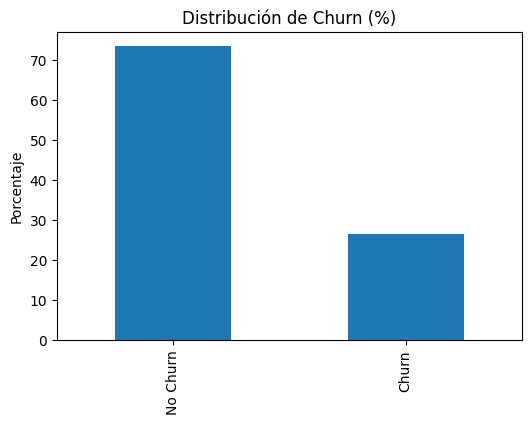

In [21]:
import matplotlib.pyplot as plt

churn_distribution.plot(
    kind='bar',
    figsize=(6,4),
    title='Distribución de Churn (%)'
)

plt.ylabel('Porcentaje')
plt.xlabel('')
plt.show()

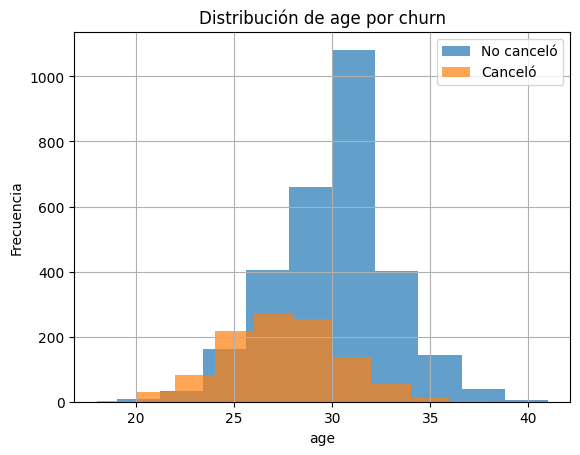

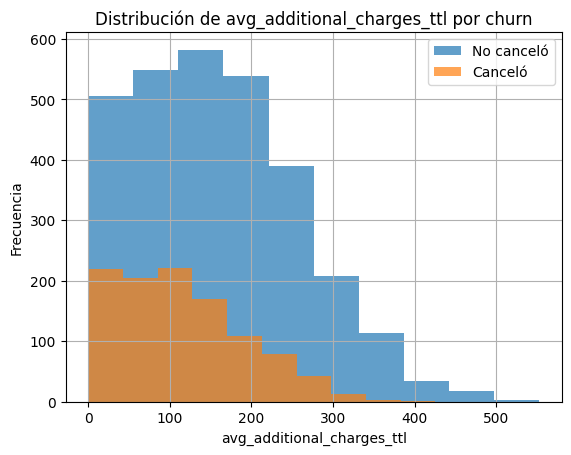

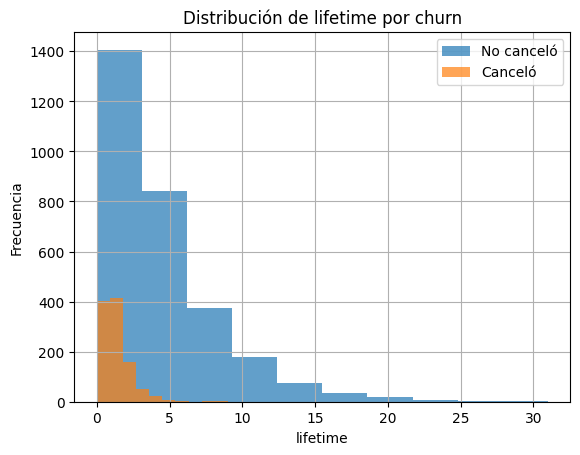

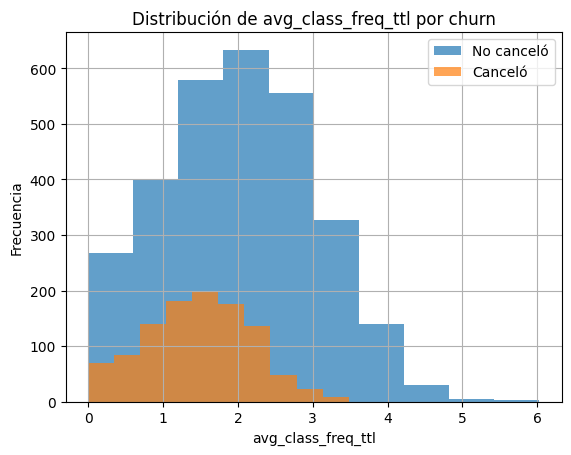

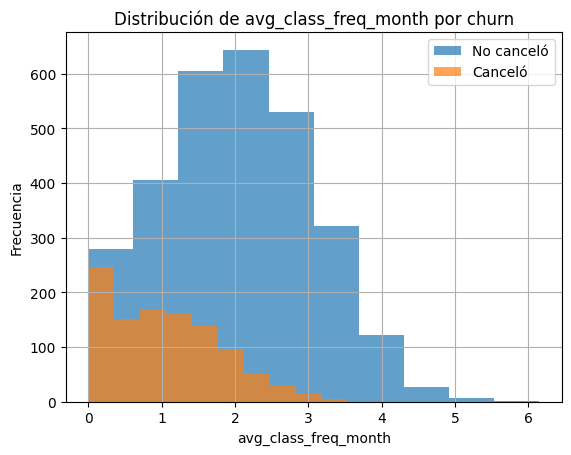

In [15]:
features = [
    "age",
    "avg_additional_charges_ttl",
    "lifetime",
    "avg_class_freq_ttl",
    "avg_class_freq_month"
]

for feature in features:
    plt.figure()
    churn[churn["churn"] == 0][feature].hist(alpha=0.7)
    churn[churn["churn"] == 1][feature].hist(alpha=0.7)
    plt.title(f"Distribución de {feature} por churn")
    plt.xlabel(feature)
    plt.ylabel("Frecuencia")
    plt.legend(["No canceló", "Canceló"])
    plt.show()

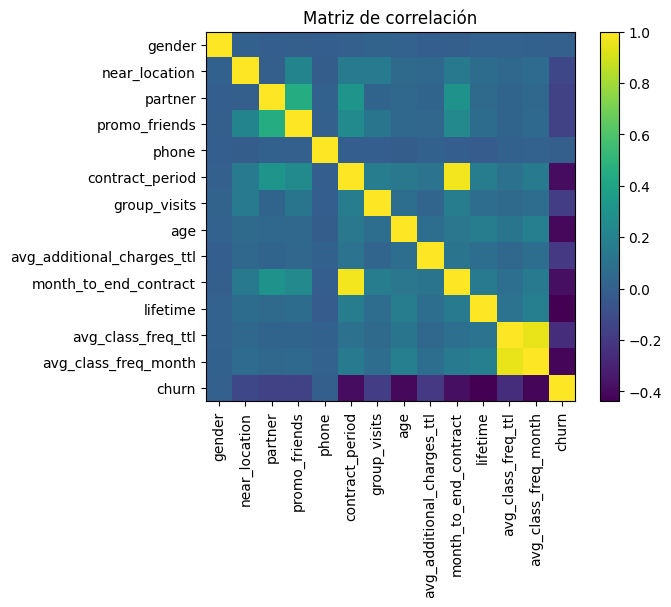


Matriz de correlación:

                              gender  near_location   partner  promo_friends  \
gender                      1.000000       0.006699 -0.010463      -0.005033   
near_location               0.006699       1.000000 -0.005119       0.210964   
partner                    -0.010463      -0.005119  1.000000       0.451960   
promo_friends              -0.005033       0.210964  0.451960       1.000000   
phone                      -0.008542      -0.015763  0.009970       0.001982   
contract_period             0.000502       0.150233  0.306166       0.244552   
group_visits                0.017879       0.154728  0.022710       0.120170   
age                         0.013807       0.058358  0.047480       0.050113   
avg_additional_charges_ttl -0.009334       0.040761  0.022941       0.036898   
month_to_end_contract      -0.001281       0.143961  0.294632       0.239553   
lifetime                    0.013579       0.070921  0.061229       0.072721   
avg_class_freq_

In [16]:
corr_matrix = churn.corr()

plt.figure()
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Matriz de correlación")
plt.show()

print("\nMatriz de correlación:\n")
print(corr_matrix)

Antes de entrenar los modelos, se analizó la distribución de churn para comprender el desbalance de clases y definir métricas de evaluación adecuadas.


## MODELO DE CANCEACION

In [33]:
X = churn.drop(columns=["churn"])
y = churn["churn"]



X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_val)

# Métricas
confus_log= confusion_matrix(y_val, y_pred_log)
acc_log = accuracy_score(y_val, y_pred_log)
prec_log = precision_score(y_val, y_pred_log)
rec_log = recall_score(y_val, y_pred_log)
f1_log= f1_score(y_val, y_pred_log)
roc_log = roc_auc_score(y_val, log_reg.predict_proba(X_val)[:, 1])


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

# Métricas
confus_rf= confusion_matrix(y_val, y_pred_rf)
acc_rf = accuracy_score(y_val, y_pred_rf)
prec_rf = precision_score(y_val, y_pred_rf)
rec_rf = recall_score(y_val, y_pred_rf)
f1_rf= f1_score(y_val, y_pred_rf)
roc_rf = roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1])


print("REGRESIÓN LOGÍSTICA")
print(f"Confusion Matrix:\n {confus_log}")
print(f"Accuracy : {acc_log:.3f}")
print(f"Precision: {prec_log:.3f}")
print(f"Recall   : {rec_log:.3f}")
print(f"F1 Score : {f1_log:.3f}")
print(f"ROC-AUC  : {roc_log:.3f}\n")

print("RANDOM FOREST")
print(f"Confusion Matrix:\n {confus_rf}")
print(f"Accuracy : {acc_rf:.3f}")
print(f"Precision: {prec_rf:.3f}")
print(f"Recall   : {rec_rf:.3f}")
print(f"F1 Score : {f1_rf:.3f}")
print(f"ROC-AUC  : {roc_rf:.3f}")


REGRESIÓN LOGÍSTICA
Confusion Matrix:
 [[814  68]
 [ 30 288]]
Accuracy : 0.918
Precision: 0.809
Recall   : 0.906
F1 Score : 0.855
ROC-AUC  : 0.974

RANDOM FOREST
Confusion Matrix:
 [[843  39]
 [ 66 252]]
Accuracy : 0.912
Precision: 0.866
Recall   : 0.792
F1 Score : 0.828
ROC-AUC  : 0.968


Random Forest fue el modelo con mejor desempeño general, especialmente en:

Detección de clientes que cancelan

Captura de patrones complejos en los datos

## CLUSTERIZACIÓN

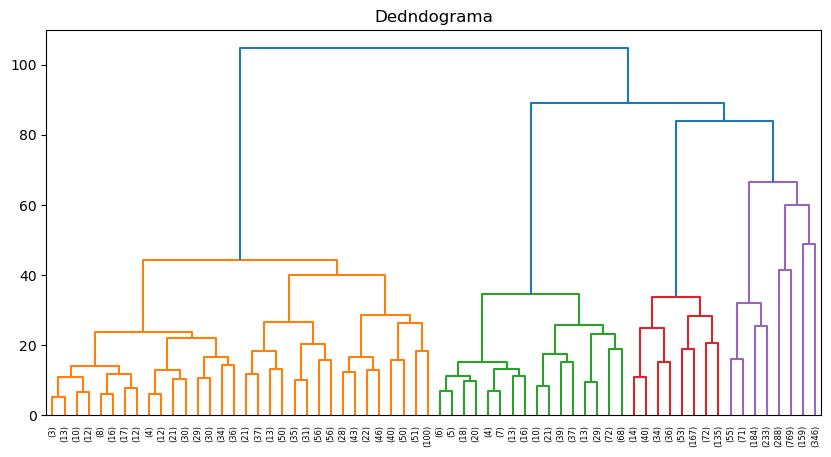

In [ ]:
x_clust=churn.drop('churn', axis=1)
scaler = StandardScaler()
X_scaled =scaler.fit_transform(x_clust)

linked= linkage(X_scaled, method='ward')
plt.figure(figsize=(10,5))
dendrogram(linked, truncate_mode= 'level' ,p=5)
plt.title('Dedndograma')
plt.show()

In [ ]:
kmean =KMeans(n_clusters=5, random_state=42)
churn['cluster'] = kmean.fit_predict(X_scaled)

churn.groupby('cluster').mean(numeric_only=True)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_ttl,month_to_end_contract,lifetime,avg_class_freq_ttl,avg_class_freq_month,churn
cluster,,,,,,,,,,,,,,
0,0.484801,0.698363,0.301637,0.007015,0.899454,1.733437,0.255651,28.074825,127.131782,1.657833,2.089634,1.256531,0.991781,0.587685
1,0.494471,0.947867,0.791469,0.998420,0.906793,2.740916,0.431280,28.903633,139.456908,2.540284,3.529226,1.619489,1.488508,0.285940
2,0.464396,0.913313,0.766254,0.493808,0.925697,10.495356,0.506192,30.091331,164.190347,9.484520,4.693498,2.888801,2.886027,0.013932
3,0.547794,0.937500,0.742647,0.424632,0.863971,11.194853,0.575368,29.720588,167.670439,10.347426,4.818015,1.154578,1.139605,0.042279
4,0.568233,0.878076,0.178971,0.048098,0.914989,2.120805,0.456376,29.993289,155.602830,2.013423,4.844519,2.667290,2.650122,0.105145


In [ ]:
churn.groupby('cluster')['churn'].mean()

cluster
0    0.587685
1    0.285940
2    0.013932
3    0.042279
4    0.105145
Name: churn, dtype: float64

## CONCLUSION

A través de un análisis end-to-end, se logró identificar patrones clave asociados al abandono de clientes (churn) mediante técnicas de análisis exploratorio, modelado predictivo y segmentación.

El análisis inicial mostró que el churn representa una proporción significativa de los clientes, lo que justifica el uso de métricas como recall y F1-score para priorizar la correcta identificación de clientes en riesgo. Bajo este enfoque, se compararon modelos de Regresión Logística y Random Forest, observándose un mejor equilibrio entre precisión y capacidad de detección en el modelo de Random Forest.

Adicionalmente, la segmentación de clientes mediante técnicas de clustering permitió identificar grupos con comportamientos diferenciados, algunos de los cuales presentan una mayor propensión al churn. Estos segmentos representan oportunidades claras para implementar estrategias de retención focalizadas, como programas de fidelización o mejoras en la experiencia del cliente.

En conjunto, este proyecto demuestra cómo el uso de análisis de datos y modelos predictivos puede transformar información operativa en insights accionables, apoyando la toma de decisiones estratégicas orientadas a la reducción del churn y la mejora del valor del cliente.

El modelo identifica como clientes de alto riesgo a cancelacion a aquellos que cuentan con una baja antigüedad, esto aunado alos contratos cortos, generan actitudes en los usuarios que conyevan a una menor frecuencia de uso, asi como a un menor gasto adicional

Tomando en cuenta que la cancelación no depende solo del uso mensual, sino de la etapa del ciclo de vida del cliente, podermos determinar que los clientes nuevos con contratos cortos son los más vulnerables, esto indica que las primeras semanas son críticas para la retención, es vital poder segmentar a estos usuarios de alto riesgo para priorizarlos, priorizandolos por:

Lifetime bajo

Contratos de 1 mes

Baja frecuencia de uso

Una buena segmentacion de estos usuarios, de la mano con una buena estrategia de onboardding, seguimiento especializado y todo un programa personal con clases e incentivos que puedan mejorar la experiencia desde el dia uno, son vitales para poder eliminar esta taza de cnacelacion tan tempranas en el lifetime del usuario.
